## Análisis de Variables

In [1]:
# Agregar las librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.patches import Patch


# Load the dataset
df = pd.read_csv('dataset.csv')
data = pd.DataFrame(df)

In [2]:
print('Datos de la encuesta: \n')

#Función 1 = len
#Utilizado para el conteo del total de personas encuestadas
totalPeople = len(data)

print('Número total de personas que contestaron la encuesta: ', totalPeople, '\n')

# Get the number of people that answered by gender
femaleAge = data['Género'] == 'Mujer'
maleAge = data['Género'] == 'Hombre'

#Función 2 = min
#Utilizada para la búsqueda de la edad minima al momento de ingresar a la carrera
minAgeFemale = data[femaleAge]['Edad de ingreso a la universidad'].min()

#Función 3 = max
#Utilizada para la búsqueda de la edad máxima al momento de ingresar a la carrera
maxAgeFemale = data[femaleAge]['Edad de ingreso a la universidad'].max()

#Función 4 = mean
#Utilizada para la búsqueda de la edad media al momento de ingresar a la carrera
meanAgeFemale = data[femaleAge]['Edad de ingreso a la universidad'].mean()

print('Edad mínima al ingresar a la universidad de las mujeres que contestaron la encuesta: ', minAgeFemale)
print('Edad máxima al ingresar a la universidad  de las mujeres que contestaron la encuesta: ', maxAgeFemale)
print('Edad promedio de las mujeres que contestaron la encuesta: ', meanAgeFemale)

print('')

#Función 2 = min
#Utilizada para la búsqueda de la edad minima al momento de ingresar a la carrera
minAgeMale = data[maleAge]['Edad de ingreso a la universidad'].min()

#Función 3 = min
#Utilizada para la búsqueda de la edad máxima al momento de ingresar a la carrera
maxAgeMale = data[maleAge]['Edad de ingreso a la universidad'].max()

#Función 4 = mean
#Utilizada para la búsqueda de la edad media al momento de ingresar a la carrera
meanAgeMale = data[maleAge]['Edad de ingreso a la universidad'].mean()

print('Edad mínima al ingresar a la universidad  de los hombres que contestaron la encuesta: ', minAgeMale)
print('Edad máxima al ingresar a la universidad  de los hombres que contestaron la encuesta: ', maxAgeMale)
print('Edad promedio de los hombres que contestaron la encuesta: ', meanAgeMale)

Datos de la encuesta: 

Número total de personas que contestaron la encuesta:  82 

Edad mínima al ingresar a la universidad de las mujeres que contestaron la encuesta:  17
Edad máxima al ingresar a la universidad  de las mujeres que contestaron la encuesta:  23
Edad promedio de las mujeres que contestaron la encuesta:  18.1

Edad mínima al ingresar a la universidad  de los hombres que contestaron la encuesta:  17
Edad máxima al ingresar a la universidad  de los hombres que contestaron la encuesta:  23
Edad promedio de los hombres que contestaron la encuesta:  18.305084745762713


## Gráficos de barra

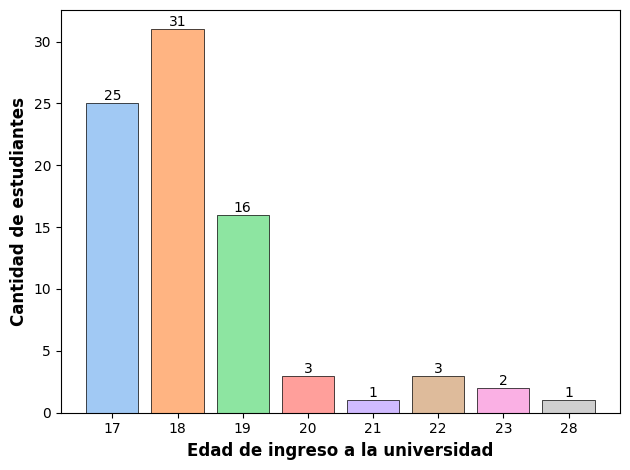

In [3]:
# Obtener la cantidad de estudiantes por edad de ingreso a la universidad
age_count = data['Edad de ingreso a la universidad'].value_counts()

# Crear el gráfico de barras
labels = age_count.values
bar_data = age_count.index

# Ordenar los datos
sorted_labels = []
sorted_bar_data = []

for index in sorted(range(len(labels)), key=bar_data.__getitem__):
    sorted_labels.append(labels[index])
    sorted_bar_data.append(str(bar_data[index]))

# Crear el gráfico de barras
bars = plt.bar(sorted_bar_data, sorted_labels, color=sns.color_palette('pastel'), edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las barras
for bar, count in zip(bars, sorted_labels):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=10)

# Configurar el gráfico
plt.xlabel('Edad de ingreso a la universidad', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de estudiantes', fontsize=12, fontweight='bold')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

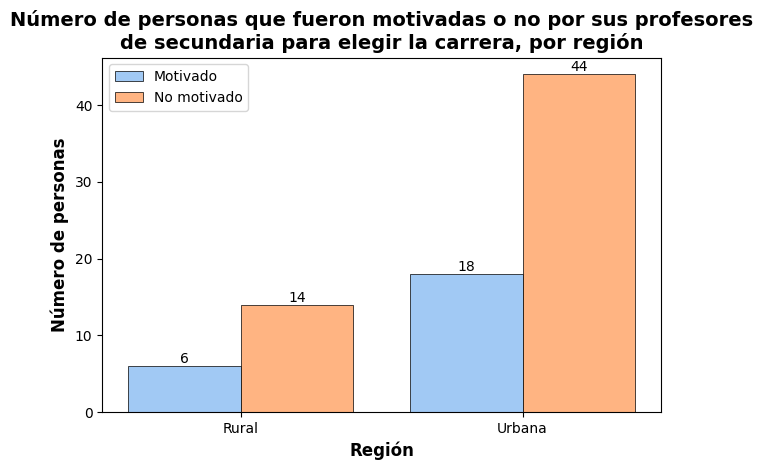

In [4]:
# Definir constantes
REGION_COL = 'Indique la región de la cual viene'
MOTIVATED_COL = '¿Tuvo motivación por los profesores de secundaria para escoger la carrera?'
COLORS = sns.color_palette('pastel')

# Función para obtener la cantidad de personas motivadas o no por región
def get_counts(data, region, motivated):
    return data[(data[REGION_COL] == region) & (data[MOTIVATED_COL] == motivated)].shape[0]

# Obtener la cantidad de personas motivadas o no por región
motivated_counts = [get_counts(data, 'Rural', 'Sí'), get_counts(data, 'Urbana', 'Sí')]
non_motivated_counts = [get_counts(data, 'Rural', 'No'), get_counts(data, 'Urbana', 'No')]

# Datos para el gráfico
region_labels = ['Rural', 'Urbana']
region_indexes = np.arange(len(region_labels))

# Crear el gráfico de barras
fig, ax = plt.subplots()
bars_motivated = ax.bar(region_indexes - 0.4 / 2, motivated_counts, 0.4, label='Motivado', color=COLORS[0], edgecolor='black', linewidth=0.5)
bars_non_motivated = ax.bar(region_indexes + 0.4 / 2, non_motivated_counts, 0.4, label='No motivado', color=COLORS[1], edgecolor='black', linewidth=0.5)

# Agregar etiquetas a las barras
ax.bar_label(bars_motivated)
ax.bar_label(bars_non_motivated)

# Configurar el gráfico
ax.set_xticks(region_indexes)
ax.set_xticklabels(region_labels)
ax.set_xlabel("Región", fontsize=12, fontweight='bold')
ax.set_ylabel("Número de personas", fontsize=12, fontweight='bold')
ax.set_title("Número de personas que fueron motivadas o no por sus profesores\nde secundaria para elegir la carrera, por región", fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

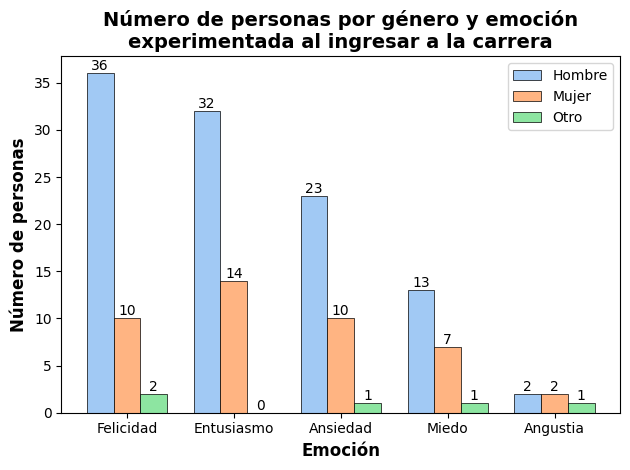

In [5]:
# Definir constantes
COLORS = sns.color_palette('pastel')
EMOTIONS = ['Felicidad', 'Entusiasmo', 'Ansiedad', 'Miedo', 'Angustia']

# Función para contar las emociones por género
def count_emotions_by_gender(data, gender, emotion):
    gender_filtered = (data['Género'] == gender)
    emotional_response_contain_emotion = data['¿Cuál fue su emoción al ingresar a la carrera?'].str.contains(emotion, na=False)
    return data[gender_filtered & emotional_response_contain_emotion].shape[0]

# Función para obtener la cantidad de personas por emoción y género
def get_emotional_counts(data, gender):
    return [count_emotions_by_gender(data, gender, emotion) for emotion in EMOTIONS]

# Obtener la cantidad de personas por emoción y género
male_counts = get_emotional_counts(data, 'Hombre')
female_counts = get_emotional_counts(data, 'Mujer')
other_counts = get_emotional_counts(data, 'Otros')

# Crear el gráfico de barras
emotional_labels = EMOTIONS
index = np.arange(len(emotional_labels))
bar_width = 0.25

fig, ax = plt.subplots()
first_bar = ax.bar(index - bar_width, male_counts, bar_width, label='Hombre', edgecolor='black', linewidth=0.5, color=COLORS[0])
second_bar = ax.bar(index, female_counts, bar_width, label='Mujer', edgecolor='black', linewidth=0.5, color=COLORS[1])
third_bar = ax.bar(index + bar_width, other_counts, bar_width, label='Otro', edgecolor='black', linewidth=0.5, color=COLORS[2])

# Agregar etiquetas a las barras
ax.bar_label(first_bar)
ax.bar_label(second_bar)
ax.bar_label(third_bar)

# Configurar el gráfico
ax.set_xlabel('Emoción', fontsize=12, fontweight='bold')
ax.set_ylabel('Número de personas', fontsize=12, fontweight='bold')
ax.set_title('Número de personas por género y emoción\nexperimentada al ingresar a la carrera', fontsize=14, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(emotional_labels)
ax.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Gráficos de pastel

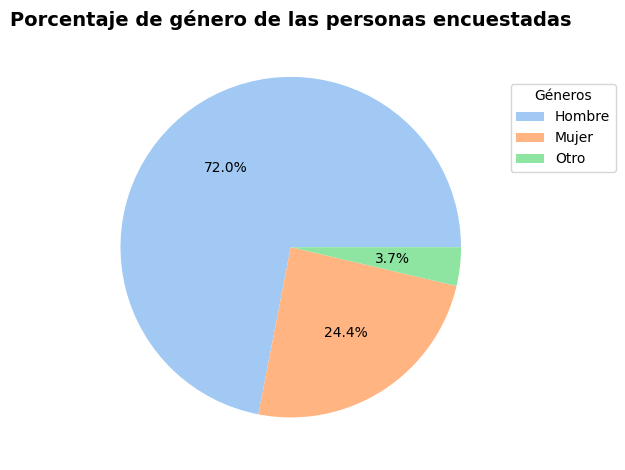

In [6]:
# Definir constantes
COLORS = sns.color_palette('pastel')

# Función 9 = value_counts
# Devuelve el tamaño de la partición respecto al género
male = data['Género'].value_counts()['Hombre']
female = data['Género'].value_counts()['Mujer']
other = totalPeople - male - female

# Definir los datos
labels = ['Hombre', 'Mujer', 'Otro']
pie_data = [male, female, other]

# Crear el gráfico de pastel
plt.title("Porcentaje de género de las personas encuestadas", fontsize=14, fontweight='bold')
plt.pie(pie_data, autopct='%1.1f%%', colors=COLORS)
plt.legend(title="Géneros", loc='upper left', labels=labels, bbox_to_anchor=(1, 0, 0.5, 0.9))
plt.tight_layout()
plt.show()

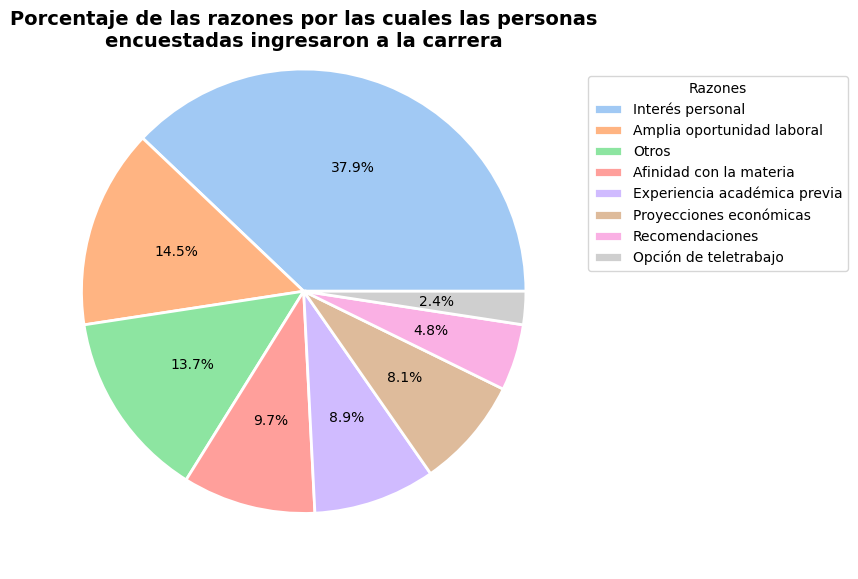

In [7]:
# Definir constantes
COLORS = sns.color_palette('pastel')

# Procesar los datos
options = data['Categorías de las razones de ingreso a carrera'].str.split('_').explode().dropna()
options_count = options.value_counts()
labels = options_count.index
pie_data = options_count.values

# Crear el gráfico de pastel
plt.figure(figsize=(8.5, 8.5))
plt.title("Porcentaje de las razones por las cuales las personas\nencuestadas ingresaron a la carrera", fontsize=14, fontweight='bold', y=0.925)
plt.pie(pie_data, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, colors=COLORS)
plt.legend(title="Razones", loc='upper left', labels=labels, bbox_to_anchor=(1, 0, 0.5, 0.9))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

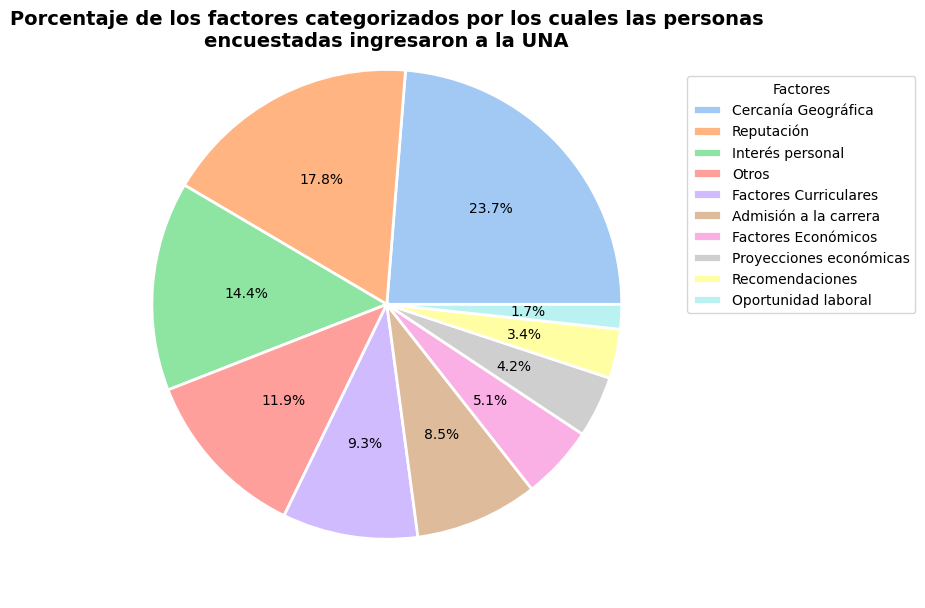

In [8]:
# Definir constantes
COLORS = sns.color_palette('pastel')

# Procesar los datos
options = data['Categorías de los factores de ingreso a la UNA'].str.split('_').explode().dropna()
options_count = options.value_counts()
labels = options_count.index
pie_data = options_count.values

# Crear el gráfico de pastel
plt.figure(figsize=(8.5, 8.5))
plt.title("Porcentaje de los factores categorizados por los cuales las personas\nencuestadas ingresaron a la UNA", fontsize=14, fontweight='bold', y=0.925)
plt.pie(pie_data, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, colors=COLORS)
plt.legend(title="Factores", loc='upper left', labels=labels, bbox_to_anchor=(1, 0, 0.5, 0.9))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

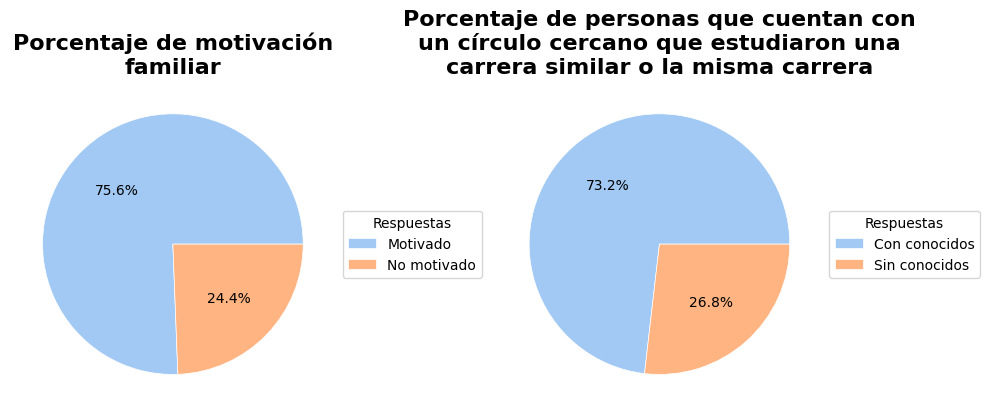

In [9]:
# Definir constantes
COL_NAME1 = '¿Tuvo motivación familiar para ingresar a la carrera?'
COL_NAME2 = '¿Tiene en su círculo cercano de amistades o conocidos alguien que estudiara una carrera similar o la misma carrera que usted escogió?'
OPTIONS = ['Sí', 'No']
COLORS = sns.color_palette('pastel')
TITLE1 = "Porcentaje de motivación\nfamiliar"
TITLE2 = "Porcentaje de personas que cuentan con\nun círculo cercano que estudiaron una\ncarrera similar o la misma carrera"
LEGEND_OPTIONS1 = ['Motivado', 'No motivado']
LEGEND_OPTIONS2 = ['Con conocidos', 'Sin conocidos']

# Procesar los datos
options_count1 = data[COL_NAME1].value_counts()
options_count2 = data[COL_NAME2].value_counts()

# Crear los gráficos de pastel
pie_data1 = [options_count1.get(option, 0) for option in OPTIONS]
pie_data2 = [options_count2.get(option, 0) for option in OPTIONS]

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].pie(pie_data1, autopct='%1.1f%%', colors=COLORS, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
axs[0].legend(title='Respuestas', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), labels=LEGEND_OPTIONS1)
axs[0].set_title(TITLE1, fontsize=16, fontweight='bold')

axs[1].pie(pie_data2, autopct='%1.1f%%', colors=COLORS, wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'})
axs[1].legend(title='Respuestas', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), labels=LEGEND_OPTIONS2)
axs[1].set_title(TITLE2, fontsize=16, fontweight='bold')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [10]:
# Filtrar por carrera que estudia y obtener el conteo respectivo
carrera_tabla = df['Carrera en la que estudia'].value_counts().reset_index()

print(carrera_tabla)

                  Carrera en la que estudia  count
0  Ingeniería en sistemas de la información     75
1                                  Economía      4
2                               Cartografía      1
3                                 Agronomía      1
4                                     Danza      1


In [11]:
# Filtrar por nivel de carrera y obtener el conteo respectivo
carrera_tabla = df['Nivel actual de la carrera'].value_counts().reset_index()

print(carrera_tabla)

  Nivel actual de la carrera  count
0                    Tercero     34
1                     Cuarto     25
2               Egresado (a)      8
3                    Primero      8
4                    Segundo      7


In [12]:
# Filtrar por tiene o tuvo una beca universitaria y obtener el conteo respectivo
carrera_tabla = df['¿Tiene actualmente o tuvo una beca universitaria?'].value_counts().reset_index()

print(carrera_tabla)

  ¿Tiene actualmente o tuvo una beca universitaria?  count
0                                                Sí     56
1                                                No     26


In [13]:
# Filtrar por ¿Sabía usted al momento de ingresar a la carrera que existían diferentes oportunidades de becas en la UNA? y obtener el conteo respectivo
carrera_tabla = df['¿Sabía usted al momento de ingresar a la carrera que existían diferentes oportunidades de becas en la UNA?'].value_counts().reset_index()

print(carrera_tabla)

  ¿Sabía usted al momento de ingresar a la carrera que existían diferentes oportunidades de becas en la UNA?  \
0                                                 Sí                                                           
1                                                 No                                                           

   count  
0     67  
1     15  


C:\Users\Fuent\AppData\Local\Temp\ipykernel_8176\1721727598.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


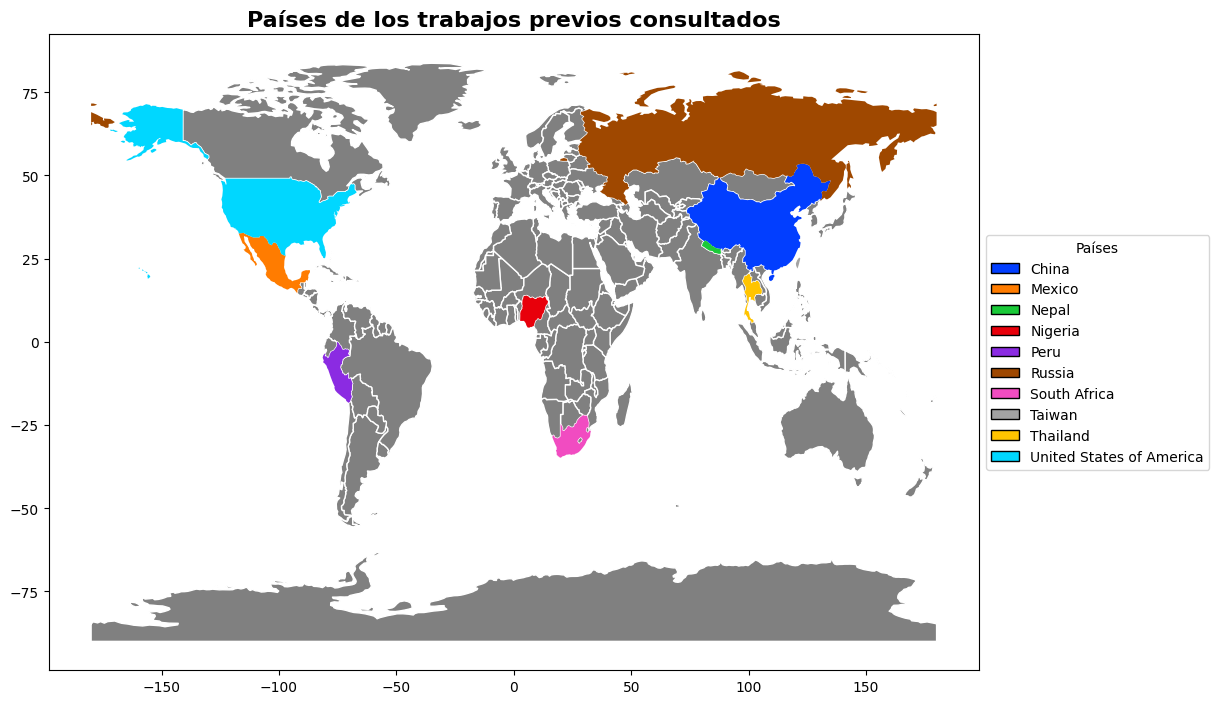

In [14]:
# Cargar el dataset de geopandas con los países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Crear un gráfico
fig, ax2 = plt.subplots(figsize=(12,12))
world.plot(ax=ax2, edgecolor='white', color='gray')

# Crear una lista con los países a resaltar
countries = ['China', 'Mexico', 'Nepal', 'Nigeria', 'Peru', 'Russia', 'South Africa', 'Taiwan', 'Thailand', 'United States of America']
countries_colors = sns.color_palette('bright', n_colors=len(countries))

# Crear los handles para la leyenda
legend_handles = []

# Resaltar los países de la lista y agregarlos a la leyenda
for country, color in zip(countries, countries_colors):
    world[world.name == country].plot(ax=ax2, color=color)
    patch = Patch(facecolor=color, edgecolor='black', label=country)
    legend_handles.append(patch)

# Ajustar el gráfico
plt.title('Países de los trabajos previos consultados', fontsize=16, fontweight='bold')
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), title='Países')
plt.show()